# Lec3: Stochastic Gradient Descent

In [1]:
from random import Random

SEED = 5

random_gen = Random(x = SEED)
def gen_random(N=1000):
    DATA_X, DATA_Y =[],[]
    for _ in range(N):
        DATA_X.append(random_gen.uniform(a=0, b=1))
    for _ in range(N):
        DATA_Y.append(random_gen.uniform(a=0, b=1))
    return DATA_X, DATA_Y

data_x,data_y = gen_random()

print(data_x[:10])

[0.6229016948897019, 0.7417869892607294, 0.7951935655656966, 0.9424502837770503, 0.7398985747399307, 0.922324996665417, 0.029005228283614737, 0.46562265437810535, 0.9433567169983137, 0.6489745531369242]


C:\Users\ayaey\AppData\Local\Temp\ipykernel_20764\2413510904.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


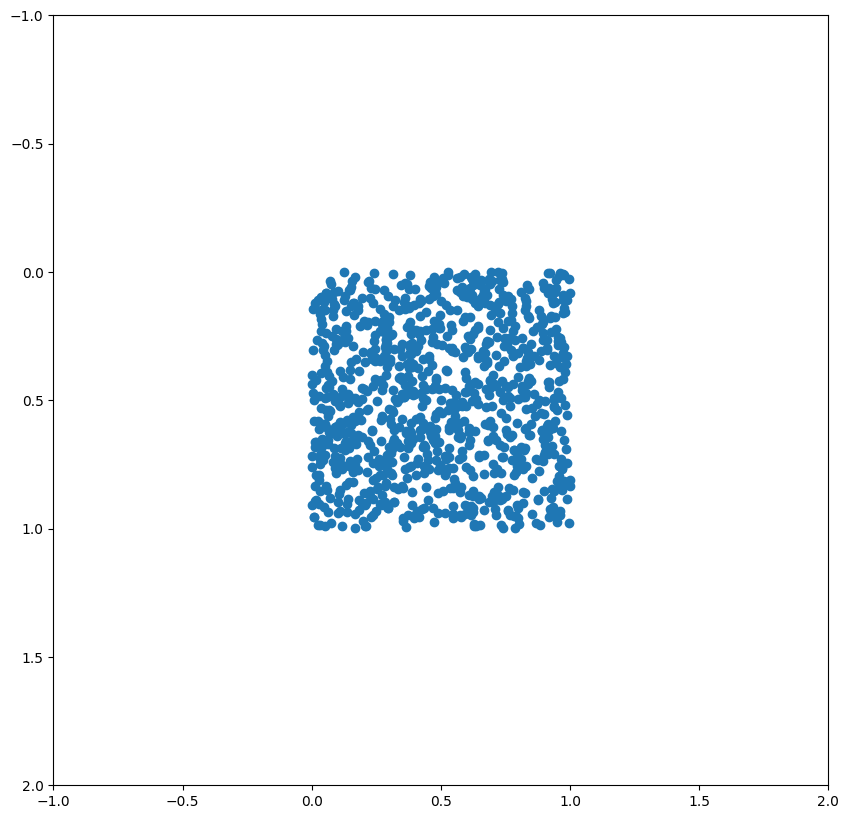

In [5]:
from matplotlib.pyplot import figure

fig = figure(figsize = (10,10))

ax= fig.add_subplot(1,1,1)
ax.scatter(data_x,data_y)

ax.set_xlim(left = -1, right = 2)
ax.set_ylim(top = -1, bottom = 2)

fig.show()

In [6]:
from math import sqrt

def loss(x_i, y_i,  x_p =5, y_p=5):
    return 1/len(x_i) * sum([sqrt((x - x_p)**2 + (y - y_p)**2) for x,y in zip(x_i, y_i)])

print(loss(data_x, data_y))

6.382888159785493


C:\Users\ayaey\AppData\Local\Temp\ipykernel_20764\290617380.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_loss.show()


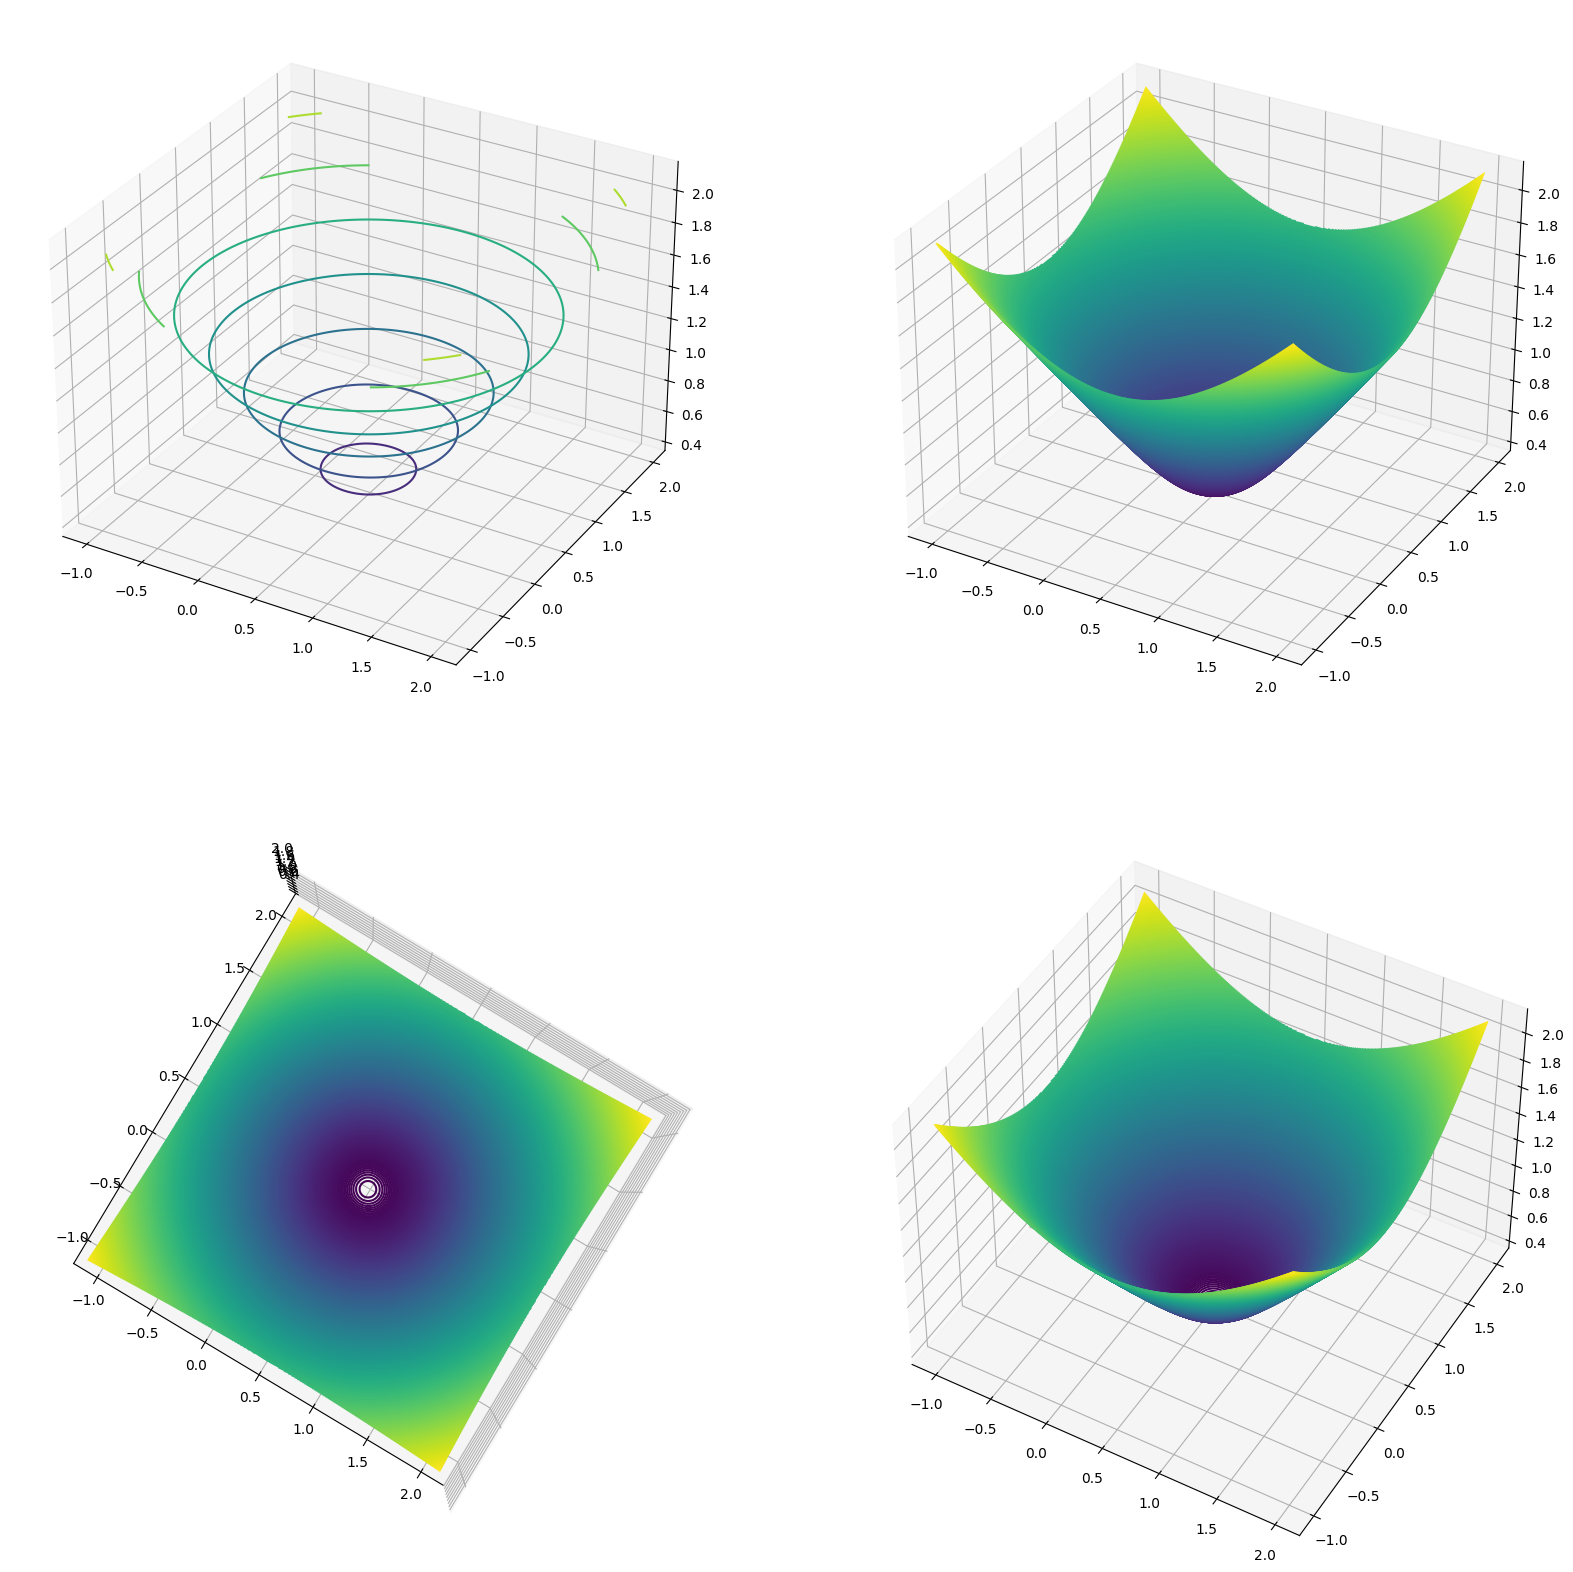

In [7]:
STEP = 0.01
MESH_SIZE = 300

def clc_loss_mesh(x_i, y_i , step = STEP, mesh_size = MESH_SIZE ):
    
    x_mesh = [-1 + i*step for i in range(mesh_size)]
    y_mesh = [-1 + i*step for i in range(mesh_size)]
 

    loss_mesh = [[loss(x_i, y_i, x_curr, y_curr) for x_curr in x_mesh] for y_curr in y_mesh]
    
    return x_mesh, y_mesh, loss_mesh
x_mesh, y_mesh, loss_mesh = clc_loss_mesh(data_x, data_y)

# print(x_mesh, y_mesh, loss_mesh)
fig_loss = figure(figsize = (20, 20))
ax_loss = fig_loss.add_subplot(2, 2, 1, projection = "3d")
ax_loss2 = fig_loss.add_subplot(2, 2, 2, projection = "3d")
ax_loss3 = fig_loss.add_subplot(2, 2, 3, projection = "3d")
ax_loss4 = fig_loss.add_subplot(2, 2, 4, projection = "3d")

ax_loss.contour(x_mesh, y_mesh, loss_mesh)
ax_loss2.contour(x_mesh, y_mesh, loss_mesh, levels = 500)
ax_loss3.contour(x_mesh, y_mesh, loss_mesh, levels = 500)
ax_loss4.contour(x_mesh, y_mesh, loss_mesh, levels = 500)

ax_loss3.view_init(elev = 90)
ax_loss4.view_init(elev = 45)

fig_loss.show()

## The closed form for gradient calculation

In [8]:
def calc_grad(x_i, y_i, x_p=5, y_p=5):
    x_grad, y_grad = 0,0
    
    for x,y in zip(x_i, y_i):
        x_grad += ((((x-x_p)**2 + (y-y_p)**2)** -0.5) * (x-x_p))/len(x_i)
        y_grad += (((x-x_p)**2 + (y-y_p)**2)** -0.5) * (y-y_p) /len(y_i)
    return -x_grad, -y_grad

x_grad, y_grad = calc_grad(data_x, data_y)
    
print(x_grad, y_grad)

0.7063740168102 0.7063243377191616


In [9]:
EPOCHS = 100
DELTA = 1e-2
def grad_losses(x_i, y_i, epochs = EPOCHS, delta = DELTA, x_p_gd = 5, y_p_gd = 5):
    
    losses = []
    
    
    for _ in range(epochs):
         
        x_grad, y_grad = calc_grad(x_i = x_i, y_i = y_i,
                                        x_p = x_p_gd, y_p = y_p_gd)
        x_p_gd -= delta * x_grad
        y_p_gd -= delta * y_grad
        
        losses.append(loss(x_i, y_i, x_p = x_p_gd, y_p = y_p_gd))
        
        
    return x_p_gd, y_p_gd, losses

x_p_grd, y_p_grd, losses = grad_losses(data_x,data_y)
print(x_p_grd, y_p_grd)

4.293768415487777 4.293810990464546


In [10]:
from math import ceil

EPOCHS = 100
DELTA = 1e-2
BATCH_SIZE = 4

def stoch_grad_losses(x_i, y_i, epochs, batch_size, delta, x_p_sgd = 0.3, y_p_sgd = 0.3):
  
    sampler = Random(x = SEED)
    n = len(x_i)
    indices = [i for i in range(len(x_i))]
    num_batches = ceil(n / batch_size)
    losses = []

    for _ in range(epochs):
  
        sampler.shuffle(indices)

    # Iterate over each mini-batch of examples
        for batch_index in range(num_batches):
            batch_indices = indices[batch_index * batch_size
                                  : (batch_index + 1) * batch_size]
            batch_x = [x_i[i] for i in batch_indices]
            batch_y = [y_i[i] for i in batch_indices]

            grad_x, grad_y = calc_grad(x_i = batch_x, y_i = batch_y,
                                     x_p = x_p_sgd, y_p = y_p_sgd)

            # Update the parameter values
            x_p_sgd -= delta * grad_x
            y_p_sgd -= delta * grad_y

            losses.append(loss(x_i = x_i, y_i = y_i,
                             x_p = x_p_sgd, y_p = y_p_sgd))

    return x_p_sgd, y_p_sgd, losses
x_p_sgd, y_p_sgd, losses = stoch_grad_losses(data_x, data_y, EPOCHS, BATCH_SIZE, DELTA)
print(x_p_sgd, y_p_sgd)



0.4847513277108123 0.463966921878374


### Traning dataset

In [11]:
EPOCHS = 100
DELTA = 0.01
BATCH_SIZE = 4
NUM_BATCHES = ceil(len(data_x)/BATCH_SIZE)

x_gd, y_gd, losses_gd = grad_losses(data_x, data_y, x_p_gd= 0.3, y_p_gd = 0.3)
x_sgd, y_sgd, losses_sgd = stoch_grad_losses(data_x, data_y, EPOCHS, BATCH_SIZE, DELTA, x_p_sgd = 0.3, y_p_sgd = 0.3)

print(f"Gradient Descent: ({x_gd}, {y_gd})")
print(f"Stochastic Gradient Descent: ({x_p_sgd}, {y_p_sgd})")

Original DELTA GD: (0.45320193427520483, 0.46041195550589614)
Original DELTA SGD: (0.4847513277108123, 0.463966921878374)
Bigger DELTA GD: (0.4832598098764912, 0.4905608390087221)
Bigger DELTA SGD: (0.4918455725260783, 0.3829379628433168)
Bigger DELTA & batch_size SGD: (0.4803618338278133, 0.3963811440612421)


In [ ]:
fig = figure(figsize = (24, 8))
ax = fig.add_subplot(1, 3, 1)
ax.plot(losses_sgd, "r")
ax.plot([i * NUM_BATCHES for i in range(len(losses_gd))], losses_gd, "b")
ax.title.set_text("Full plot")
ax.set_xlabel("Iterations")
ax.set_ylabel("Losses")

ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(losses_sgd, "r")
ax2.plot([i * NUM_BATCHES for i in range(len(losses_gd))], losses_gd, "b")
ax2.title.set_text("Last 1000 iterations")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Losses")

fig.show()